# **Weight of Evidence (WoE)**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## 1. **¿Qué es el WoE?**
El WoE es una transformación estadística que mide la fuerza de separación entre dos grupos, típicamente los "buenos" (clientes que cumplen con sus pagos) y los "malos" (clientes que no cumplen). Se calcula para cada categoría de una variable, convirtiendo valores categóricos o continuos en una escala logarítmica. Esto permite analizar la relación entre una variable independiente y el comportamiento crediticio.

La fórmula del WoE es:

$$
WoE = \ln \left( \frac{\% \text{ de buenos en la categoría}}{\% \text{ de malos en la categoría}} \right)
$$

## 2. **Uso del WoE en Credit Scoring**
En los modelos de credit scoring, como los basados en **Regresión Logística**, el WoE juega un papel importante por varias razones:

### a) **Transformación de Variables:**
   - El WoE convierte variables categóricas o continuas en valores que son directamente utilizables en un modelo lineal.
   - Ayuda a tratar problemas como la no linealidad entre las variables predictoras y el resultado.

### b) **Mejora de la Interpretabilidad:**
   - El WoE facilita la interpretación de las variables. Por ejemplo, un valor alto de WoE para una categoría indica una mayor probabilidad de que los clientes sean buenos.

### c) **Manejo de Sesgos:**
   - Las transformaciones WoE son menos sensibles a valores atípicos, lo que hace que los modelos sean más robustos.

### d) **Detección de Monotonicidad:**
   - Al calcular el WoE, es fácil verificar si existe una relación lógica entre las categorías de una variable y el resultado (monotonicidad). Esto es crucial en scoring, ya que los modelos suelen requerir relaciones consistentes.

- El WoE se usa como entrada al modelo en lugar de los valores originales de la variable.

# Paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
data = pd.read_csv("credit_risk_dataset.csv")
data.dropna(inplace=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


# WoE con variables cualitativas

## Paso 1: Tabla de frecuencias

In [4]:
t_freq = data.loan_grade.value_counts()
t_freq

,count
loan_grade,
A,9402
B,9151
C,5699
D,3248
E,870
F,209
G,59


## Paso 2: Crear la tabla cruzada

In [5]:
t_cross = pd.crosstab(data['loan_grade'],data['loan_status'])
t_cross

loan_status,0,1
loan_grade,,
A,8498,904
B,7698,1453
C,4542,1157
D,1325,1923
E,308,562
F,63,146
G,1,58


## Paso 3: Crear la tabla cruzada relativa

In [6]:
t_cross_rel = t_cross.div(t_freq, axis=0)
t_cross_rel.columns = ['Bueno','Malo']
t_cross_rel

,Bueno,Malo
loan_grade,,
A,0.903850,0.096150
B,0.841220,0.158780
C,0.796982,0.203018
D,0.407943,0.592057
E,0.354023,0.645977
F,0.301435,0.698565
G,0.016949,0.983051


<Axes: xlabel='loan_grade'>

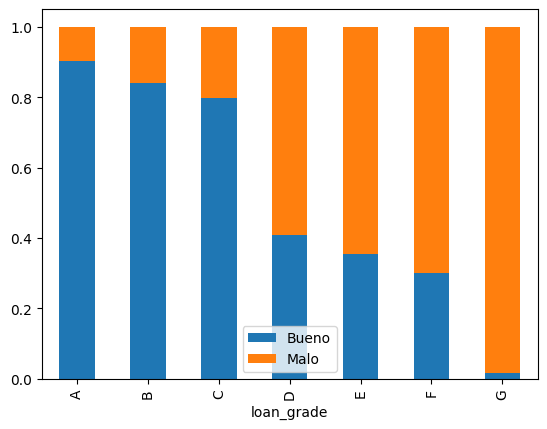

In [7]:
t_cross_rel.plot(kind='bar',stacked=True)

## Paso 4: Calcular ratio logaritmico

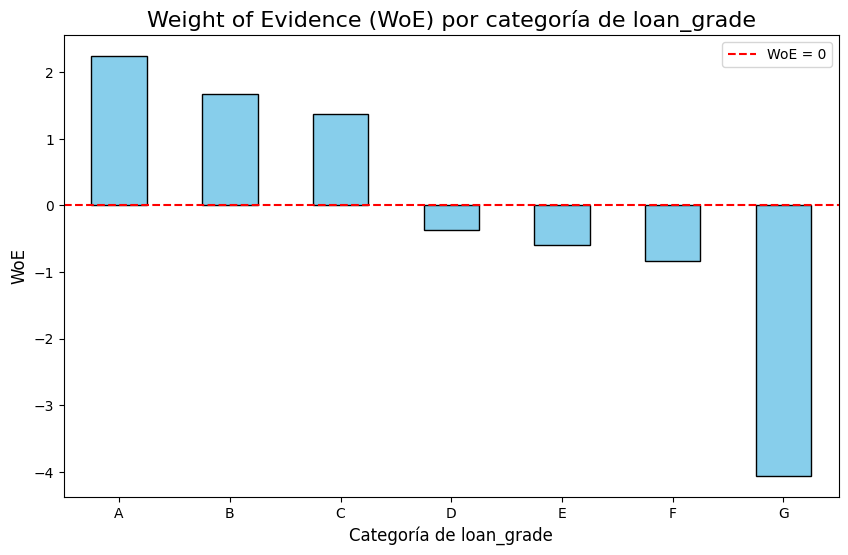

In [8]:
WoE_grade = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
# Crear la gráfica
WoE_grade.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6))

# Personalizar la gráfica
plt.title('Weight of Evidence (WoE) por categoría de loan_grade', fontsize=16)  # Título
plt.xlabel('Categoría de loan_grade', fontsize=12)  # Etiqueta eje X
plt.ylabel('WoE', fontsize=12)  # Etiqueta eje Y
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para que se vean mejor

# Agregar línea de referencia (puede ser 0 o cualquier otro valor de interés)
plt.axhline(0, color='red', linestyle='--', label='WoE = 0')  # Línea de referencia en WoE = 0
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.show()

## Paso 5: Aplicando el WoE

In [9]:
WoE_grade_dict = WoE_grade.to_dict()
WoE_grade_dict

{'A': 2.2407567602825806,
 'B': 1.6673301702734087,
 'C': 1.3675369954718273,
 'D': -0.37247400716845713,
 'E': -0.6014020669201166,
 'F': -0.8404718953168037,
 'G': -4.060443010546419}

In [10]:
data['loan_grade_woe'] = data['loan_grade'].map(WoE_grade_dict)

In [11]:
t_WoE_grade = data.pivot_table(index='loan_grade_woe',values='loan_status').reset_index()
t_WoE_grade.head(10)

,loan_grade_woe,loan_status
0,-4.060443,0.983051
1,-0.840472,0.698565
2,-0.601402,0.645977
3,-0.372474,0.592057
4,1.367537,0.203018
5,1.667330,0.158780
6,2.240757,0.096150


<Axes: xlabel='loan_grade_woe', ylabel='loan_status'>

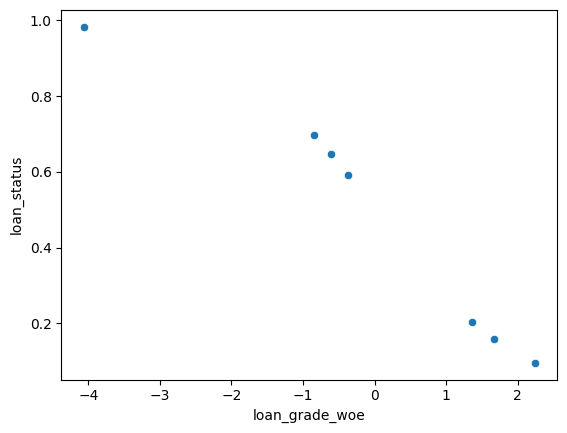

In [12]:
sns.scatterplot(t_WoE_grade,x='loan_grade_woe',y='loan_status')

# WoE con variables cuantitativas

## Paso 1: Discretizando variables

In [13]:
#loan_percent_income

In [14]:
num_cuantiles = 10
data['loan_percent_income_freq'] = pd.qcut(data['loan_percent_income'], q=num_cuantiles, labels=False)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_woe,loan_percent_income_freq
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,-0.372474,9
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,1.667330,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.367537,9
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,1.367537,9
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,1.367537,9


## Paso 2: Tabla de frecuencias

In [15]:
t_freq = data.loan_percent_income_freq.value_counts()
t_freq

,count
loan_percent_income_freq,
1,3638
4,3569
6,3411
0,3056
8,2743
9,2691
2,2573
7,2557
3,2367


## Paso 3: Crear la tabla cruzada

In [16]:
t_cross = pd.crosstab(data['loan_percent_income_freq'],data['loan_status'])
t_cross

loan_status,0,1
loan_percent_income_freq,,
0,2743,313
1,3187,451
2,2241,332
3,2082,285
4,3091,478
5,1692,341
6,2792,619
7,2063,494
8,1776,967


## Paso 4: Crear la tabla cruzada relativa

In [17]:
t_cross_rel = t_cross.div(t_freq, axis=0)
t_cross_rel.columns = ['Bueno','Malo']
t_cross_rel

,Bueno,Malo
loan_percent_income_freq,,
0,0.897579,0.102421
1,0.876031,0.123969
2,0.870968,0.129032
3,0.879594,0.120406
4,0.866069,0.133931
5,0.832268,0.167732
6,0.818528,0.181472
7,0.806805,0.193195
8,0.647466,0.352534


<Axes: xlabel='loan_percent_income_freq'>

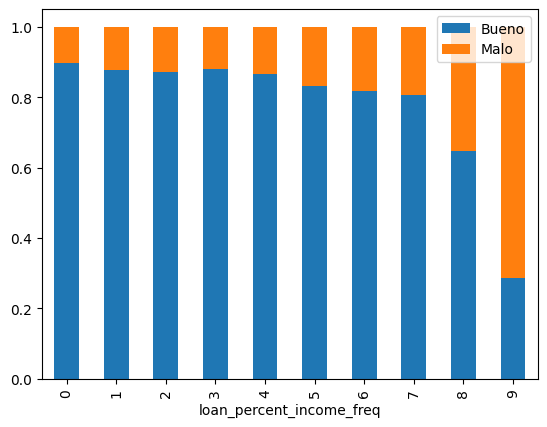

In [18]:
t_cross_rel.plot(kind='bar',stacked=True)

## Paso 5: Calcular ratio logaritmico

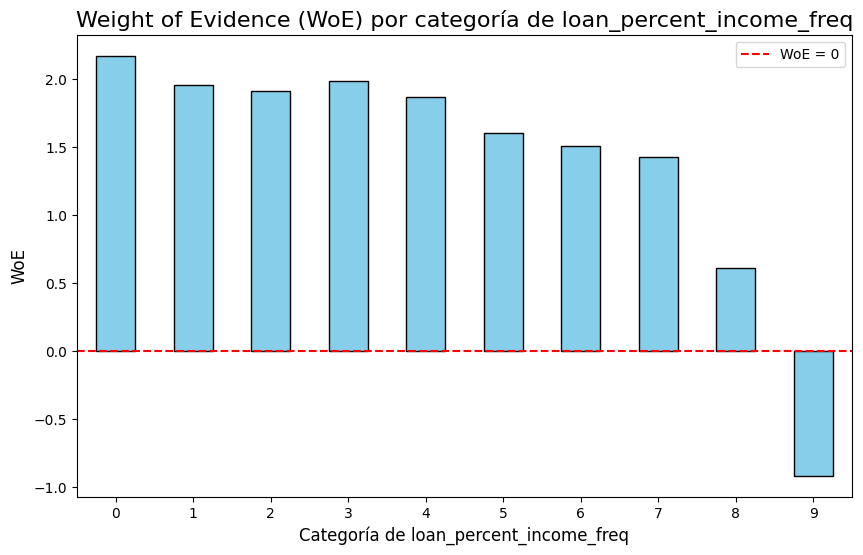

In [19]:
WoE_percent_income = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
# Crear la gráfica
WoE_percent_income.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6))

# Personalizar la gráfica
plt.title('Weight of Evidence (WoE) por categoría de loan_percent_income_freq', fontsize=16)  # Título
plt.xlabel('Categoría de loan_percent_income_freq', fontsize=12)  # Etiqueta eje X
plt.ylabel('WoE', fontsize=12)  # Etiqueta eje Y
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para que se vean mejor

# Agregar línea de referencia (puede ser 0 o cualquier otro valor de interés)
plt.axhline(0, color='red', linestyle='--', label='WoE = 0')  # Línea de referencia en WoE = 0
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.show()

## Paso 6: Aplicando el WoE

In [20]:
WoE_percent_income_dict = WoE_percent_income.to_dict()
WoE_percent_income_dict

{0: 2.17060430039745,
 1: 1.955367974914658,
 2: 1.9095425048844386,
 3: 1.9885950689062637,
 4: 1.8666392096406603,
 5: 1.6017840628826518,
 6: 1.506408191197667,
 7: 1.4293809958833292,
 8: 0.6079204280988211,
 9: -0.9178520124411075}

In [21]:
data['loan_percent_income_woe'] = data['loan_percent_income_freq'].map(WoE_percent_income_dict)

In [22]:
t_WoE_percent_income = data.pivot_table(index='loan_percent_income_woe',values='loan_status').reset_index()
t_WoE_percent_income.head(10)

,loan_percent_income_woe,loan_status
0,-0.917852,0.714604
1,0.607920,0.352534
2,1.429381,0.193195
3,1.506408,0.181472
4,1.601784,0.167732
5,1.866639,0.133931
6,1.909543,0.129032
7,1.955368,0.123969
8,1.988595,0.120406
9,2.170604,0.102421


<Axes: xlabel='loan_percent_income_woe', ylabel='loan_status'>

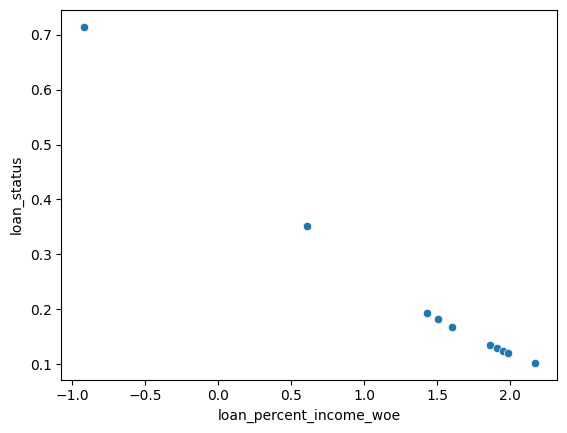

In [23]:
sns.scatterplot(t_WoE_percent_income,x='loan_percent_income_woe',y='loan_status')

In [24]:
data[['loan_status','loan_percent_income_woe','loan_grade_woe']].corr()

,loan_status,loan_percent_income_woe,loan_grade_woe
loan_status,1.000000,-0.419037,-0.416962
loan_percent_income_woe,-0.419037,1.000000,0.113113
loan_grade_woe,-0.416962,0.113113,1.000000


# Automatización

## Función

In [44]:
def get_woe(data,var,number=False):
  if number:
    num_cuantiles = 10
    data[var+'2'] = pd.qcut(data[var], q=num_cuantiles, labels=False, duplicates='drop')
    var = var+'2'
  t_freq = data[var].value_counts()
  t_cross = pd.crosstab(data[var],data['loan_status'])
  t_cross_rel = t_cross.div(t_freq, axis=0)
  t_cross_rel.columns = ['Bueno','Malo']
  WoE = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
  WoE_dict = WoE.to_dict()
  val_WoE = data[var].map(WoE_dict)
  return val_WoE

In [26]:
data_woe = data[['loan_status']]
data_woe.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


## Verificación

In [27]:
data_woe['loan_percent_income_woe'] = get_woe(data,'loan_percent_income',number=True)
data_woe['loan_grade_woe'] = get_woe(data,'loan_grade',number=False)
data_woe.corr()

<ipython-input-27-22999112dc1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe['loan_percent_income_woe'] = get_woe(data,'loan_percent_income',number=True)
<ipython-input-27-22999112dc1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe['loan_grade_woe'] = get_woe(data,'loan_grade',number=False)


,loan_status,loan_percent_income_woe,loan_grade_woe
loan_status,1.000000,-0.419037,-0.416962
loan_percent_income_woe,-0.419037,1.000000,0.113113
loan_grade_woe,-0.416962,0.113113,1.000000


## Generalización

In [45]:
data = pd.read_csv("credit_risk_dataset.csv")
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [46]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('loan_status')
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [47]:
textual_columns = data.select_dtypes(include=['object']).columns.tolist()
textual_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [48]:
data_woe = data[['loan_status']]
data_woe.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


In [50]:
for var in numerical_columns:
  data_woe[var+'_woe'] = get_woe(data,var,number=True)

<ipython-input-50-9a67c408f61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe[var+'_woe'] = get_woe(data,var,number=True)
<ipython-input-50-9a67c408f61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe[var+'_woe'] = get_woe(data,var,number=True)
<ipython-input-50-9a67c408f61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [51]:
for var in textual_columns:
  data_woe[var+'_woe'] = get_woe(data,var,number=False)

<ipython-input-51-9c15880114ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe[var+'_woe'] = get_woe(data,var,number=False)
<ipython-input-51-9c15880114ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe[var+'_woe'] = get_woe(data,var,number=False)
<ipython-input-51-9c15880114ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [52]:
data_woe.head()

,loan_status,person_age_woe,person_income_woe,person_emp_length_woe,loan_amnt_woe,loan_int_rate_woe,loan_percent_income_woe,cb_person_cred_hist_length_woe,person_home_ownership_woe,loan_intent_woe,loan_grade_woe,cb_person_default_on_file_woe
0,1,1.076709,1.463948,1.637415,0.648950,-0.433111,-0.917852,1.221376,0.789157,1.402262,-0.372474,0.499658
1,0,1.076709,0.140084,1.468908,1.364043,1.597503,1.909543,1.221376,2.640035,1.583988,1.667330,1.504960
2,1,1.250621,0.140084,0.940217,1.463238,1.419286,-0.917852,1.221376,1.938281,1.002410,1.367537,1.504960
3,1,1.308631,1.660841,1.310706,0.648950,0.371305,-0.917852,1.221376,0.789157,1.002410,1.367537,1.504960
4,1,1.281751,1.497042,1.523904,0.648950,0.371305,-0.917852,1.250305,0.789157,1.002410,1.367537,0.499658


In [53]:
data_woe.corr()

,loan_status,person_age_woe,person_income_woe,person_emp_length_woe,loan_amnt_woe,loan_int_rate_woe,loan_percent_income_woe,cb_person_cred_hist_length_woe,person_home_ownership_woe,loan_intent_woe,loan_grade_woe,cb_person_default_on_file_woe
loan_status,1.000000,-0.041163,-0.277783,-0.103199,-0.129213,-0.371899,-0.419037,-0.026329,-0.238383,-0.127236,-0.416962,-0.182019
person_age_woe,-0.041163,1.000000,0.159381,0.072806,-0.065285,-0.005537,0.053560,0.588401,0.039671,-0.070232,-0.007383,-0.004835
person_income_woe,-0.277783,0.159381,1.000000,0.196853,-0.313498,0.038278,0.326474,0.087770,0.222321,0.007285,0.029969,0.026996
person_emp_length_woe,-0.103199,0.072806,0.196853,1.000000,-0.079001,0.049410,0.043924,0.061552,0.207310,-0.004539,0.044408,0.032226
loan_amnt_woe,-0.129213,-0.065285,-0.313498,-0.079001,1.000000,0.146834,0.419622,-0.047482,-0.077835,0.007196,0.163894,0.052917
loan_int_rate_woe,-0.371899,-0.005537,0.038278,0.049410,0.146834,1.000000,0.098077,-0.010447,0.102246,0.015180,0.890310,0.490926
loan_percent_income_woe,-0.419037,0.053560,0.326474,0.043924,0.419622,0.098077,1.000000,0.022427,0.082494,0.005053,0.113113,0.029707
cb_person_cred_hist_length_woe,-0.026329,0.588401,0.087770,0.061552,-0.047482,-0.010447,0.022427,1.000000,0.038622,-0.057985,-0.011073,-0.011169
person_home_ownership_woe,-0.238383,0.039671,0.222321,0.207310,-0.077835,0.102246,0.082494,0.038622,1.000000,0.061925,0.089351,0.053008
loan_intent_woe,-0.127236,-0.070232,0.007285,-0.004539,0.007196,0.015180,0.005053,-0.057985,0.061925,1.000000,0.017712,0.007449


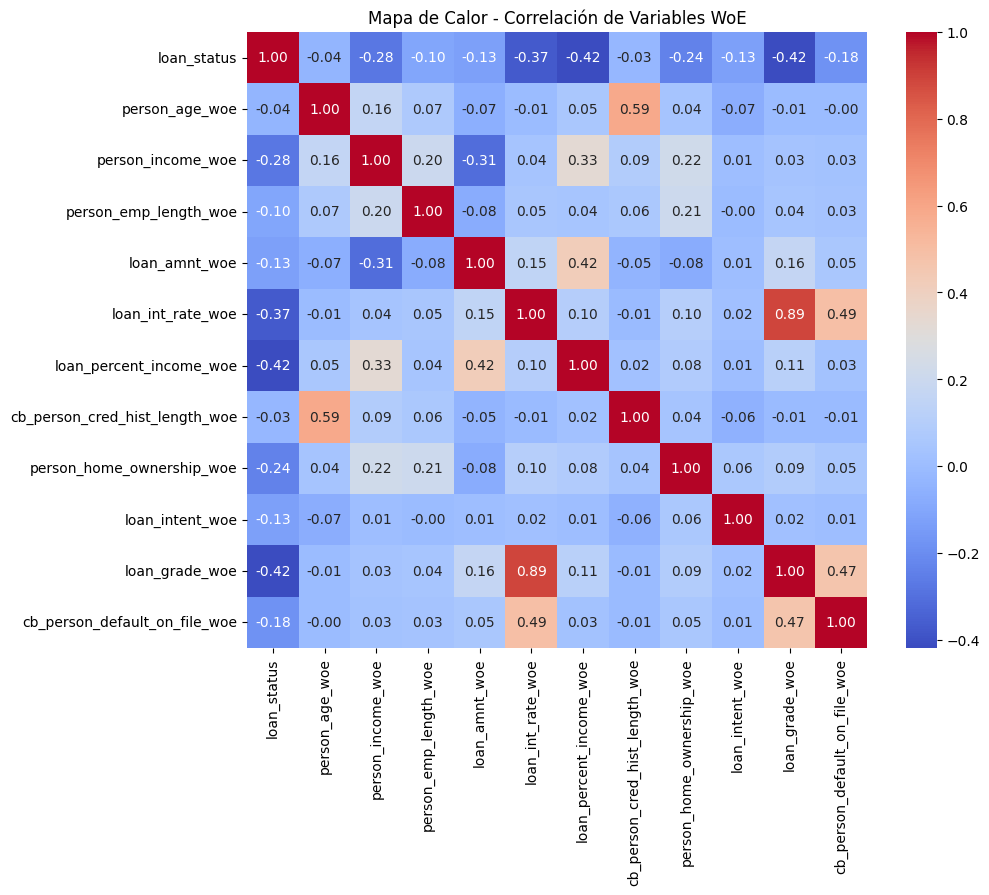

In [54]:
# Calcular la matriz de correlación
corr_matrix = data_woe.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Mostrar el gráfico
plt.title('Mapa de Calor - Correlación de Variables WoE')
plt.show()